<img src="http://oproject.org/tiki-download_file.php?fileId=8&display&x=450&y=128" width="200" height="200">
<img src="http://gfif.udea.edu.co/root/tmva/img/tmva_logo.gif" width="200" height="200">

# Variance Threshold Transformation
<hr style="border-top-width: 4px; border-top-color: #34609b;"> 

## Introduction

In high energy physics and machine learning problems, we often encounter data which have large number of input variables. However to extract maximum information from the data, we need to select the relevant input variables for the multivariate classification and regression methods implemented in TMVA. Variance Threshold is a simple unsupervised variable selection method which automates this process. 

It computes weighted variance $\sigma^2_V$ for each variable $V$ and ignores the ones whose variance doesn't meet a specific threshold. Weighted variance for each variable is defined as follows: 
$$\sigma^2_V = \frac{\sum_{i=1}^N w_i (x_i - \mu_V)^2}{\sum_{i=1}^N w_i}$$

where $N$ is the number of events in a dataset, $x_i$ denotes the value of variable for the $i$th event, $w_i$ is the weight of each event and $\mu_V$ denotes the weighted mean of variable. 
$$\mu_V = \frac{\sum_{i=1}^N w_i x_i}{\sum_{i=1}^N w_i}$$

A threshold $T$ for variance can be set by user otherwise default value of threshold is zero i.e. remove the variables which have same value in all the events. We get a new set of variables $S$ which can be formally defined as: 

$$S = \{V  \mid \sigma^2_V > T \}$$

In [1]:
import ROOT
from ROOT import TFile, TMVA, TCut

Welcome to JupyROOT 6.07/07


## Initialize DataLoader and Factory 

In [2]:
outputFile = TFile("VTOutput.root", "RECREATE")
inputFile  = TFile("mydataset.root")

TMVA.Tools.Instance()

factory = TMVA.Factory("TMVAClassification",
                       outputFile,
                       "!V:ROC:!Correlations:!Silent:Color:!DrawProgressBar:AnalysisType=Classification")
   
loader = TMVA.DataLoader("mydataset")

# Adding variables to dataset
loader.AddVariable("var0", 'F')
loader.AddVariable("var1", 'F')
loader.AddVariable("var2", 'F')
loader.AddVariable("var3 := var0-var1", 'F')
loader.AddVariable("var4 := var0*var2", 'F')
loader.AddVariable("var5 := var1+var2", 'F')

--- Factory                  : You are running ROOT Version: 6.07/07, Apr 1, 2016
--- Factory                  : 
--- Factory                  : _/_/_/_/_/ _|      _|  _|      _|    _|_|   
--- Factory                  :    _/      _|_|  _|_|  _|      _|  _|    _| 
--- Factory                  :   _/       _|  _|  _|  _|      _|  _|_|_|_| 
--- Factory                  :  _/        _|      _|    _|  _|    _|    _| 
--- Factory                  : _/         _|      _|      _|      _|    _| 
--- Factory                  : 
--- Factory                  : ___________TMVA Version 4.2.1, Feb 5, 2015
--- Factory                  : 


## Setup Dataset from Trees

In [3]:
print "--- TMVAClassification       : Using input file:", inputFile.GetName()
   
# Register the training and test trees
tsignal     = inputFile.Get("MyMCSig")
tbackground = inputFile.Get("MyMCBkg")
     
signalWeight     = 1.0
backgroundWeight = 1.0
    
mycuts = TCut("")
mycutb = TCut("")

loader.AddSignalTree(tsignal, signalWeight)
loader.AddBackgroundTree(tbackground, backgroundWeight)
loader.fSignalWeight = signalWeight
loader.fBackgroundWeight = backgroundWeight
loader.fTreeS = tsignal
loader.fTreeB = tbackground
loader.PrepareTrainingAndTestTree(mycuts,
                                  mycutb,
                                  "nTrain_Signal=3000:nTrain_Background=3000:nTest_Signal=1449:nTest_Background=1449:SplitMode=Random:NormMode=NumEvents:!V")

--- TMVAClassification       : Using input file: mydataset.root
--- DataSetInfo              : Dataset[mydataset] : Added class "Signal"	 with internal class number 0
--- mydataset                : Add Tree MyMCSig of type Signal with 5449 events
--- DataSetInfo              : Dataset[mydataset] : Added class "Background"	 with internal class number 1
--- mydataset                : Add Tree MyMCBkg of type Background with 5449 events
--- mydataset                : Preparing trees for training and testing...


## Apply Variance Threshold 

After having dataset loaded in DataLoader with all the variables, we are now ready to apply Variance Threshold transformation. It is implemented in VarTransform method in [DataLoader](https://root.cern.ch/doc/master/classTMVA_1_1DataLoader.html) class. 

### Method Definition
Parameters: Transformation definition string  
Returns: DataLoader with selected subset of variables   

Transformation defintion string **should only follow** either of the following formats otherwise method would raise an error.

|String            | Description                                                            |
|------------------|------------------------------------------------------------------------|
|"VT"              | Select variables whose variance is above threshold value = 0 (Default) |
|"VT(float_value)" | Select variables whose variance lies above float_value passed.         |




In [4]:
newloader = loader.VarTransform("VT(2.95)")

--- mydataset                : Transformation: VT
--- mydataset                : Threshold value: 2.95
--- DataSetFactory           : Dataset[mydataset] : Splitmode is: "RANDOM" the mixmode is: "SAMEASSPLITMODE"
--- DataSetFactory           : Dataset[mydataset] : Create training and testing trees -- looping over class "Signal" ...
--- DataSetFactory           : Dataset[mydataset] : Weight expression for class 'Signal': ""
--- DataSetFactory           : Dataset[mydataset] : Create training and testing trees -- looping over class "Background" ...
--- DataSetFactory           : Dataset[mydataset] : Weight expression for class 'Background': ""
--- DataSetFactory           : Dataset[mydataset] : Number of events in input trees (after possible flattening of arrays):
--- DataSetFactory           : Dataset[mydataset] :     Signal          -- number of events       : 5449   / sum of weights: 5449 
--- DataSetFactory           : Dataset[mydataset] :     Background      -- number of events       

In [5]:
vars = newloader.GetDataSetInfo().G

--- mydataset                : Transformation: VT
--- mydataset                : Threshold value: 0
--- DataSetFactory           : Dataset[mydataset] : Splitmode is: "RANDOM" the mixmode is: "SAMEASSPLITMODE"
--- DataSetFactory           : Dataset[mydataset] : Create training and testing trees -- looping over class "Signal" ...
--- DataSetFactory           : Dataset[mydataset] : Weight expression for class 'Signal': ""
--- DataSetFactory           : Dataset[mydataset] : Create training and testing trees -- looping over class "Background" ...
--- DataSetFactory           : Dataset[mydataset] : Weight expression for class 'Background': ""
--- DataSetFactory           : Dataset[mydataset] : Number of events in input trees (after possible flattening of arrays):
--- DataSetFactory           : Dataset[mydataset] :     Signal          -- number of events       : 5449   / sum of weights: 5449 
--- DataSetFactory           : Dataset[mydataset] :     Background      -- number of events       : 5

## Error Checks
If parameter passed to VarTransform method doesn't follow the correct format as described in this section, error would be raised and program execution would abort. Following are some examples of incorrect format: 

In [6]:
errloader = myloader.VarTransform("some_random_string")

Exception: TMVA::DataLoader* TMVA::DataLoader::VarTransform(TString trafoDefinition) =>
    FATAL error (C++ exception of type runtime_error)

--- <FATAL> mydataset                : Incorrect transformation string provided, please check
***> abort program execution


In [7]:
errloader = myloader.VarTransform("VT(incorrect_string)")

Exception: TMVA::DataLoader* TMVA::DataLoader::VarTransform(TString trafoDefinition) =>
    FATAL error (C++ exception of type runtime_error)

--- <FATAL> mydataset                : Incorrect transformation string provided, please check VT transformation must be passed a floating threshold value
***> abort program execution


## Book Methods

In [8]:
# Boosted Decision Trees
factory.BookMethod(myloader,
                   TMVA.Types.kBDT,
                   "BDT",
                   "!V:NTrees=5:MinNodeSize=2.5%:MaxDepth=2:BoostType=AdaBoost:AdaBoostBeta=0.5:UseBaggedBoost:BaggedSampleFraction=0.5:SeparationType=GiniIndex:nCuts=20")

# TMVA ANN: MLP Multilayer Perceptrons
factory.BookMethod(myloader,
                   TMVA.Types.kMLP,
                   "MLP",
                   "!V:NeuronType=tanh:VarTransform=N:NCycles=150:HiddenLayers=N+5:TestRate=5:!UseRegulator")

<ROOT.TMVA::MethodMLP object ("MLP") at 0x7ff1f00c5a00>

--- Factory                  : Booking method: BDT DataSet Name: mydataset
--- DataSetFactory           : Dataset[mydataset] : Splitmode is: "RANDOM" the mixmode is: "SAMEASSPLITMODE"
--- DataSetFactory           : Dataset[mydataset] : Create training and testing trees -- looping over class "Signal" ...
--- DataSetFactory           : Dataset[mydataset] : Weight expression for class 'Signal': ""
--- DataSetFactory           : Dataset[mydataset] : Create training and testing trees -- looping over class "Background" ...
--- DataSetFactory           : Dataset[mydataset] : Weight expression for class 'Background': ""
--- DataSetFactory           : Dataset[mydataset] : Number of events in input trees (after possible flattening of arrays):
--- DataSetFactory           : Dataset[mydataset] :     Signal          -- number of events       : 5449   / sum of weights: 5449 
--- DataSetFactory           : Dataset[mydataset] :     Background      -- number of events       : 5449   / sum of weights: 5

## Training the Methods

In [9]:
factory.TrainAllMethods()

--- Factory                  :  
--- Factory                  : Train all methods for Classification ...
--- Factory                  : 
--- Factory                  : current transformation string: 'I'
--- Factory                  : Dataset[mydataset] : Create Transformation "I" with events from all classes.
--- Id                       : Transformation, Variable selection : 
--- Id                       : Input : variable 'var0-var1' (index=0).   <---> Output : variable 'var0-var1' (index=0).
--- Id                       : Input : variable 'var0*var2' (index=1).   <---> Output : variable 'var0*var2' (index=1).
--- Id                       : Input : variable 'var1+var2' (index=2).   <---> Output : variable 'var1+var2' (index=2).
--- Id                       : Preparing the Identity transformation...
--- TFHandler_Factory        : ----------------------------------------------------------------
--- TFHandler_Factory        :  Variable         Mean         RMS   [        Min         Max

## Testing and Evaluating the data

In [10]:
factory.TestAllMethods()

factory.EvaluateAllMethods()

--- Factory                  : Test all methods...
--- Factory                  : Test method: BDT for Classification performance
--- BDT                      : Dataset[mydataset] : Evaluation of BDT on testing sample (2898 events)
--- BDT                      : Dataset[mydataset] : Elapsed time for evaluation of 2898 events: 0.00127 sec       
--- Factory                  : Test method: MLP for Classification performance
--- MLP                      : Dataset[mydataset] : Evaluation of MLP on testing sample (2898 events)
--- MLP                      : Dataset[mydataset] : Elapsed time for evaluation of 2898 events: 0.00458 sec       
--- Factory                  : Evaluate all methods...
--- Factory                  : Evaluate classifier: BDT
--- BDT                      : Dataset[mydataset] : Loop over test events and fill histograms with classifier response...
--- Factory                  : Write evaluation histograms to file
--- TFHandler_BDT            : Plot event variables for B

## Ploting ROC Curve

==> TMVAClassification is done!


The TBufferJSON class is necessary for JS visualisation to work and cannot be found. Did you enable the http module (-D http=ON for CMake)?


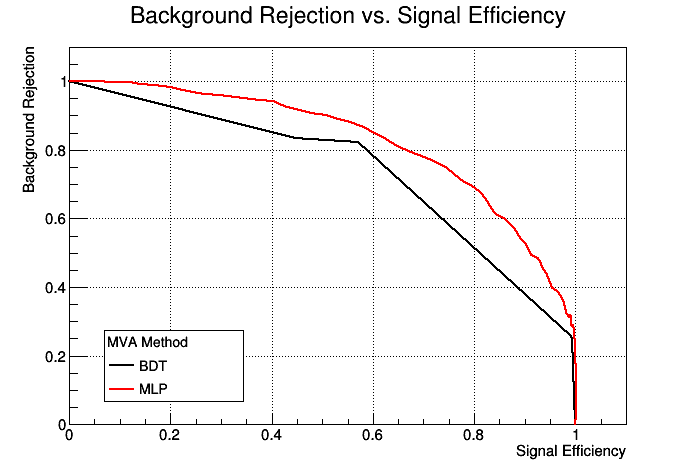

In [11]:
c = factory.GetROCCurve(myloader)
c.Draw()
print "==> TMVAClassification is done!"
outputFile.Close()